In [1]:
# Librerías para manejo de datos
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar

import numpy as np

# Composicion de pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

# Regresion lineal
from sklearn.linear_model import LinearRegression


# Para preparar los datos
# ------------------------
from sklearn import tree as tr
from sklearn.preprocessing import LabelEncoder
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
from sklearn.preprocessing import MinMaxScaler, minmax_scale

# Importar/ Exportar modelos
from joblib import dump, load

#Librerías para la visualización
# -------------------------
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns; sns.set()  # for plot styling

from sklearn.metrics import silhouette_samples, silhouette_score

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots


from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

from sklearn.preprocessing import OneHotEncoder

# q-q plots
import scipy.stats as stats

# Metricas
from sklearn.metrics import mean_squared_error as mse

In [2]:
# Se cargan los datos. 
df_original=pd.read_csv('202120_Laboratorio_3_data_SkillCraftHistoric.csv', sep=',', encoding = 'utf-8', index_col=None)
df_tracks = df_original.copy()
print(df_tracks.shape)
df_tracks.head(5)

(3238, 19)


,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,6.429631,27,10,3000,143.718,0.0035151591,0.0002196974,7,0.0001098487,0.0003923169,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.0
1,6.034862,23,10,5000,129.2322,0.0033038124,0.0002594617,4,0.0002940566,0.0004324362,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.00020757
2,5.000659,30,10,200,69.9612,0.0011010906,0.0003355705,4,0.0002936242,0.0004614094,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.00018876
3,3.264122,19,20,400,107.6016,0.0010335422,0.0002131015,1,5.32753697310659e-05,0.0005434088,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.00038358
4,3.883553,32,10,500,122.8908,0.0011360136,0.0003273259,2,0.0,0.0013285582,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,1.9254e-05


In [3]:
df_recent = pd.read_csv('202120_Laboratorio_3_data_SkillCraftRecent.csv')
print(df_recent.shape)
df_recent.head(5)

(103, 18)


,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,16,24,300,81.0702,0.001747,0.000104,0,0.000026,0.000143,0.002620,47.4800,75.0846,5.0796,14,0.000808,6,0.000026,0.000039
1,22,20,1200,120.7014,0.005496,0.000240,5,0.000000,0.000022,0.003613,44.8387,60.9175,4.8089,31,0.000516,5,0.000000,0.000000
2,20,24,233,69.1764,0.000331,0.000026,0,0.000093,0.000198,0.001997,44.1333,93.4040,6.3113,15,0.000489,4,0.000000,0.000000
3,22,10,500,67.1406,0.001152,0.000260,5,0.000000,0.000056,0.003846,56.5437,55.7295,3.0290,15,0.001133,3,0.000000,0.000000
4,17,8,400,87.5310,0.001468,0.000264,4,0.000000,0.000169,0.003464,59.3443,53.3478,4.2609,13,0.000998,7,0.000000,0.000320


### Datos Originales

In [4]:
df_original.shape

(3238, 19)

In [5]:
df_original.dtypes

LeagueIndex             float64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                      object
SelectByHotkeys          object
AssignToHotkeys          object
UniqueHotkeys            object
MinimapAttacks           object
MinimapRightClicks       object
NumberOfPACs            float64
GapBetweenPACs           object
ActionLatency            object
ActionsInPAC            float64
TotalMapExplored         object
WorkersMade             float64
UniqueUnitsMade          object
ComplexUnitsMade         object
ComplexAbilitiesUsed     object
dtype: object

In [6]:
df_num = df_tracks.select_dtypes(['number']).copy()
df_num.describe()

,LeagueIndex,NumberOfPACs,ActionsInPAC,WorkersMade
count,3238.000000,3238.000000,3238.000000,3238.000000
mean,5.866763,0.003443,5.277123,0.001037
std,3.111672,0.000971,1.507255,0.000525
min,0.000000,0.000679,2.038900,0.000077
25%,4.123874,0.002751,4.264100,0.000685
50%,5.680387,0.003386,5.093550,0.000910
75%,7.082546,0.004017,6.035900,0.001268
max,20.000000,0.007971,18.558100,0.005149


In [7]:
df_original_t = df_original.copy()

In [8]:
df_original_t.isnull().sum().sort_values()

LeagueIndex             0
UniqueUnitsMade         0
WorkersMade             0
TotalMapExplored        0
ActionsInPAC            0
ActionLatency           0
GapBetweenPACs          0
NumberOfPACs            0
ComplexUnitsMade        0
MinimapRightClicks      0
UniqueHotkeys           0
AssignToHotkeys         0
SelectByHotkeys         0
APM                     0
TotalHours              0
HoursPerWeek            0
Age                     0
MinimapAttacks          0
ComplexAbilitiesUsed    0
dtype: int64

In [9]:
df_original_t["LeagueIndex"].replace({"a": "x", "b": "y"}, inplace=True)

In [10]:
df_original_t.loc[(df_original_t.LeagueIndex < 0) | (df_original_t.LeagueIndex > 10) , "LeagueIndex"] = None
df_original_t.loc[df_original_t.Age == "NA-VALUE" , "Age"] = None
df_original_t.loc[df_original_t.HoursPerWeek == "NA-VALUE" , "HoursPerWeek"] = None
df_original_t.loc[df_original_t.TotalHours == "NA-VALUE" , "TotalHours"] = None
df_original_t.loc[df_original_t.APM == "NA-VALUE" , "APM"] = None
df_original_t.loc[df_original_t.SelectByHotkeys == "NA-VALUE" , "SelectByHotkeys"] = None
df_original_t.loc[df_original_t.AssignToHotkeys == "NA-VALUE" , "AssignToHotkeys"] = None
df_original_t.loc[df_original_t.UniqueHotkeys == "NA-VALUE" , "UniqueHotkeys"] = None
df_original_t.loc[df_original_t.MinimapAttacks == "NA-VALUE" , "MinimapAttacks"] = None
df_original_t.loc[df_original_t.MinimapRightClicks == "NA-VALUE" , "MinimapRightClicks"] = None
df_original_t.loc[df_original_t.GapBetweenPACs == "NA-VALUE" , "GapBetweenPACs"] = None
df_original_t.loc[df_original_t.ActionLatency == "NA-VALUE" , "ActionLatency"] = None
df_original_t.loc[df_original_t.TotalMapExplored == "NA-VALUE" , "TotalMapExplored"] = None
df_original_t.loc[df_original_t.UniqueUnitsMade == "NA-VALUE" , "UniqueUnitsMade"] = None
df_original_t.loc[df_original_t.ComplexUnitsMade == "NA-VALUE" , "ComplexUnitsMade"] = None
df_original_t.loc[df_original_t.ComplexAbilitiesUsed == "NA-VALUE" , "ComplexAbilitiesUsed"] = None

In [11]:
#Eliminación registros con ausencias
df_original_t = df_original_t.dropna()

In [12]:
#Se cambian las columas de tipo Object a int 
df_original_t["Age"]=df_original_t["Age"].astype(int)
df_original_t["HoursPerWeek"]=df_original_t["HoursPerWeek"].astype(int)
df_original_t["TotalHours"]=df_original_t["TotalHours"].astype(int)
df_original_t["APM"]=df_original_t["APM"].astype(float)
df_original_t["SelectByHotkeys"]=df_original_t["SelectByHotkeys"].astype(float)
df_original_t["AssignToHotkeys"]=df_original_t["AssignToHotkeys"].astype(float)
df_original_t["UniqueHotkeys"]=df_original_t["UniqueHotkeys"].astype(int)
df_original_t["MinimapAttacks"]=df_original_t["MinimapAttacks"].astype(float)
df_original_t["MinimapRightClicks"]=df_original_t["MinimapRightClicks"].astype(float)
df_original_t["GapBetweenPACs"]=df_original_t["GapBetweenPACs"].astype(float)
df_original_t["ActionLatency"]=df_original_t["ActionLatency"].astype(float)
df_original_t["TotalMapExplored"]=df_original_t["TotalMapExplored"].astype(int)
df_original_t["UniqueUnitsMade"]=df_original_t["UniqueUnitsMade"].astype(int)
df_original_t["ComplexUnitsMade"]=df_original_t["ComplexUnitsMade"].astype(float)
df_original_t["ComplexAbilitiesUsed"]=df_original_t["ComplexAbilitiesUsed"].astype(float)

In [13]:
# Eliminación de registros duplicados.
df_original_t = df_original_t.drop_duplicates()

In [14]:
#Rescalar
trans = MinMaxScaler()
trans.fit(df_original_t)
df = pd.DataFrame(trans.transform(df_original_t), columns = df_original_t.columns)
df.describe

<bound method NDFrame.describe of       LeagueIndex       Age  HoursPerWeek  TotalHours       APM  \
0        0.642963  0.392857      0.059524    0.002997  0.330799   
1        0.603486  0.250000      0.059524    0.004997  0.291411   
2        0.500066  0.500000      0.059524    0.000197  0.130248   
3        0.326412  0.107143      0.119048    0.000397  0.232595   
4        0.388355  0.571429      0.059524    0.000497  0.274168   
...           ...       ...           ...         ...       ...   
3117     0.489355  0.142857      0.047619    0.000397  0.370010   
3118     0.603074  0.000000      0.333333    0.001497  0.446126   
3119     0.625286  0.178571      0.047619    0.000097  0.270928   
3120     0.398587  0.142857      0.166667    0.000397  0.305149   
3121     0.535119  0.214286      0.035714    0.000397  0.181539   

      SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  MinimapAttacks  \
0            0.081580         0.133287            0.7        0.036382   
1            0.

In [15]:
df_recent.shape

(103, 18)

In [16]:
df_recent.dtypes

Age                       int64
HoursPerWeek              int64
TotalHours                int64
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

In [17]:
# Eliminación de registros duplicados.
df_recent = df_recent.drop_duplicates()

In [18]:
df_original_t.loc[df_original_t.Age == "NA-VALUE" , "Age"] = None
df_original_t.loc[df_original_t.HoursPerWeek == "NA-VALUE" , "HoursPerWeek"] = None
df_original_t.loc[df_original_t.TotalHours == "NA-VALUE" , "TotalHours"] = None
df_original_t.loc[df_original_t.APM == "NA-VALUE" , "APM"] = None
df_original_t.loc[df_original_t.SelectByHotkeys == "NA-VALUE" , "SelectByHotkeys"] = None
df_original_t.loc[df_original_t.AssignToHotkeys == "NA-VALUE" , "AssignToHotkeys"] = None
df_original_t.loc[df_original_t.UniqueHotkeys == "NA-VALUE" , "UniqueHotkeys"] = None
df_original_t.loc[df_original_t.MinimapAttacks == "NA-VALUE" , "MinimapAttacks"] = None
df_original_t.loc[df_original_t.MinimapRightClicks == "NA-VALUE" , "MinimapRightClicks"] = None
df_original_t.loc[df_original_t.GapBetweenPACs == "NA-VALUE" , "GapBetweenPACs"] = None
df_original_t.loc[df_original_t.ActionLatency == "NA-VALUE" , "ActionLatency"] = None
df_original_t.loc[df_original_t.TotalMapExplored == "NA-VALUE" , "TotalMapExplored"] = None
df_original_t.loc[df_original_t.UniqueUnitsMade == "NA-VALUE" , "UniqueUnitsMade"] = None
df_original_t.loc[df_original_t.ComplexUnitsMade == "NA-VALUE" , "ComplexUnitsMade"] = None
df_original_t.loc[df_original_t.ComplexAbilitiesUsed == "NA-VALUE" , "ComplexAbilitiesUsed"] = None

In [19]:
df_recent = df_recent.dropna()

In [20]:
#Rescalar
trans = MinMaxScaler()
trans.fit(df_recent)
df_r = pd.DataFrame(trans.transform(df_recent), columns = df_recent.columns)
df_r.describe

<bound method NDFrame.describe of           Age  HoursPerWeek  TotalHours       APM  SelectByHotkeys  \
0    0.000000          0.55    0.132653  0.189127         0.067419   
1    0.545455          0.45    0.591837  0.364485         0.212108   
2    0.363636          0.55    0.098469  0.136500         0.012759   
3    0.545455          0.20    0.234694  0.127492         0.044465   
4    0.090909          0.15    0.183673  0.217714         0.056673   
..        ...           ...         ...       ...              ...   
98   0.909091          0.35    0.489796  0.164030         0.075946   
99   0.090909          0.10    0.107143  0.337148         0.056852   
100  1.000000          0.25    0.209184  0.230558         0.007371   
101  0.181818          0.40    0.107143  0.193311         0.063451   
102  0.636364          0.05    0.285714  0.222366         0.128816   

     AssignToHotkeys  UniqueHotkeys  MinimapAttacks  MinimapRightClicks  \
0           0.146232       0.000000        0.08423

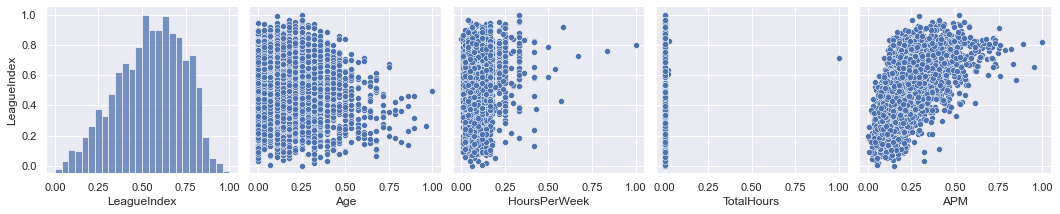

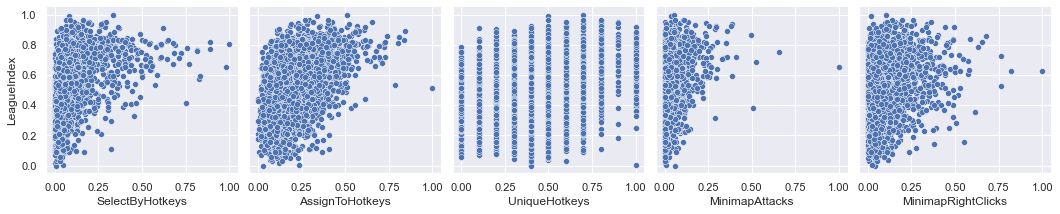

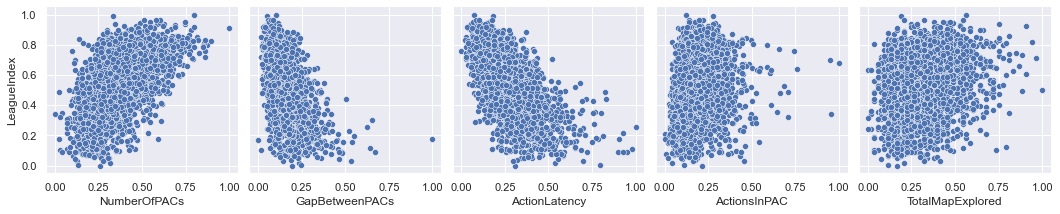

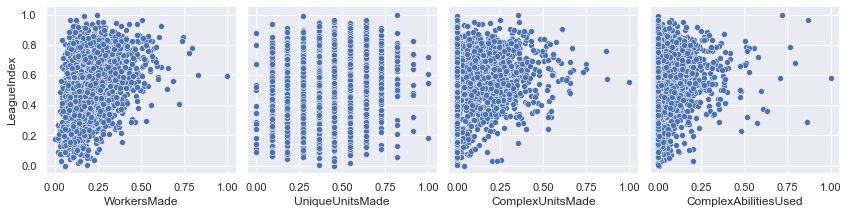

In [21]:
sns.pairplot(df, height=3, y_vars = 'LeagueIndex', x_vars = df.columns[0:5], kind='scatter')
sns.pairplot(df, height=3, y_vars = 'LeagueIndex', x_vars = df.columns[5:10], kind='scatter')
sns.pairplot(df, height=3, y_vars = 'LeagueIndex', x_vars = df.columns[10:15], kind='scatter')
sns.pairplot(df, height=3, y_vars = 'LeagueIndex', x_vars = df.columns[15:20], kind='scatter')

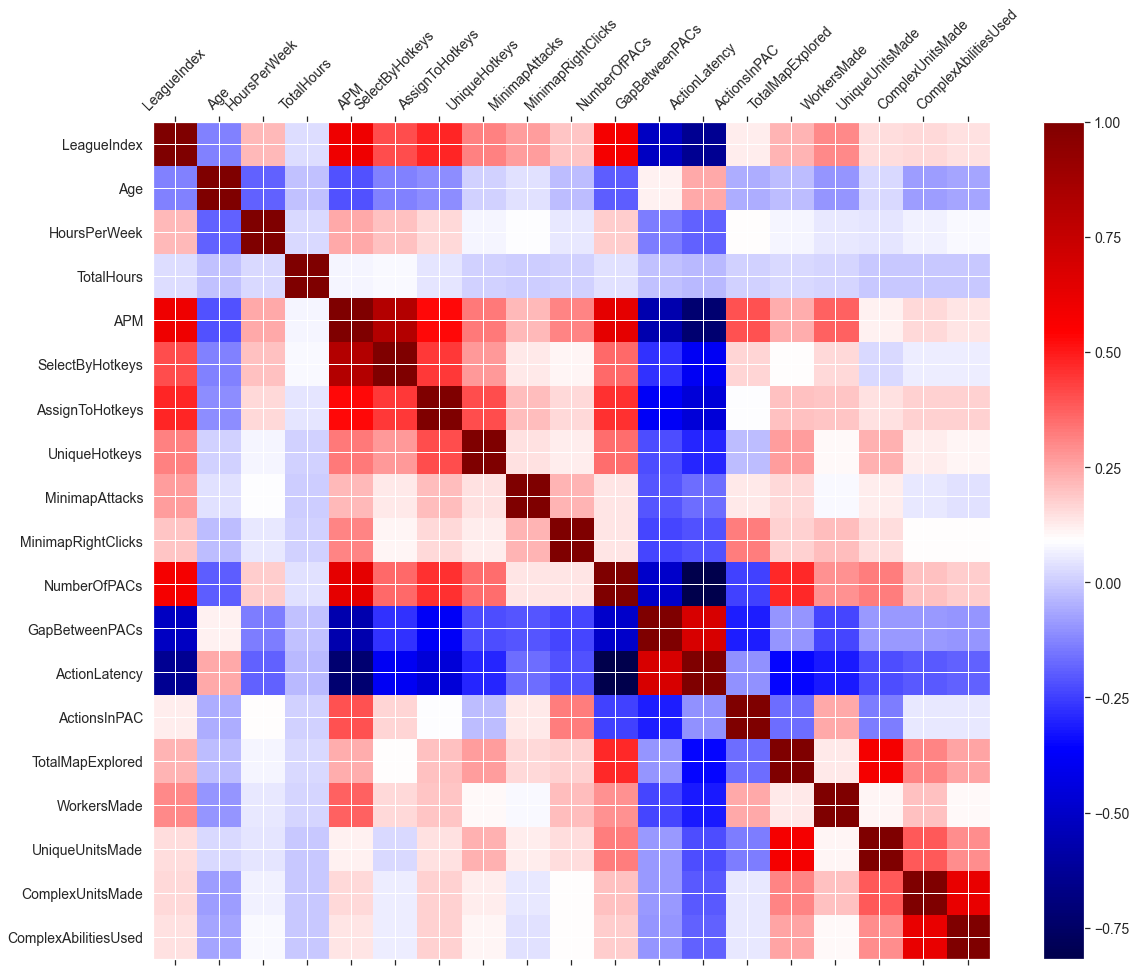

In [22]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize=14)

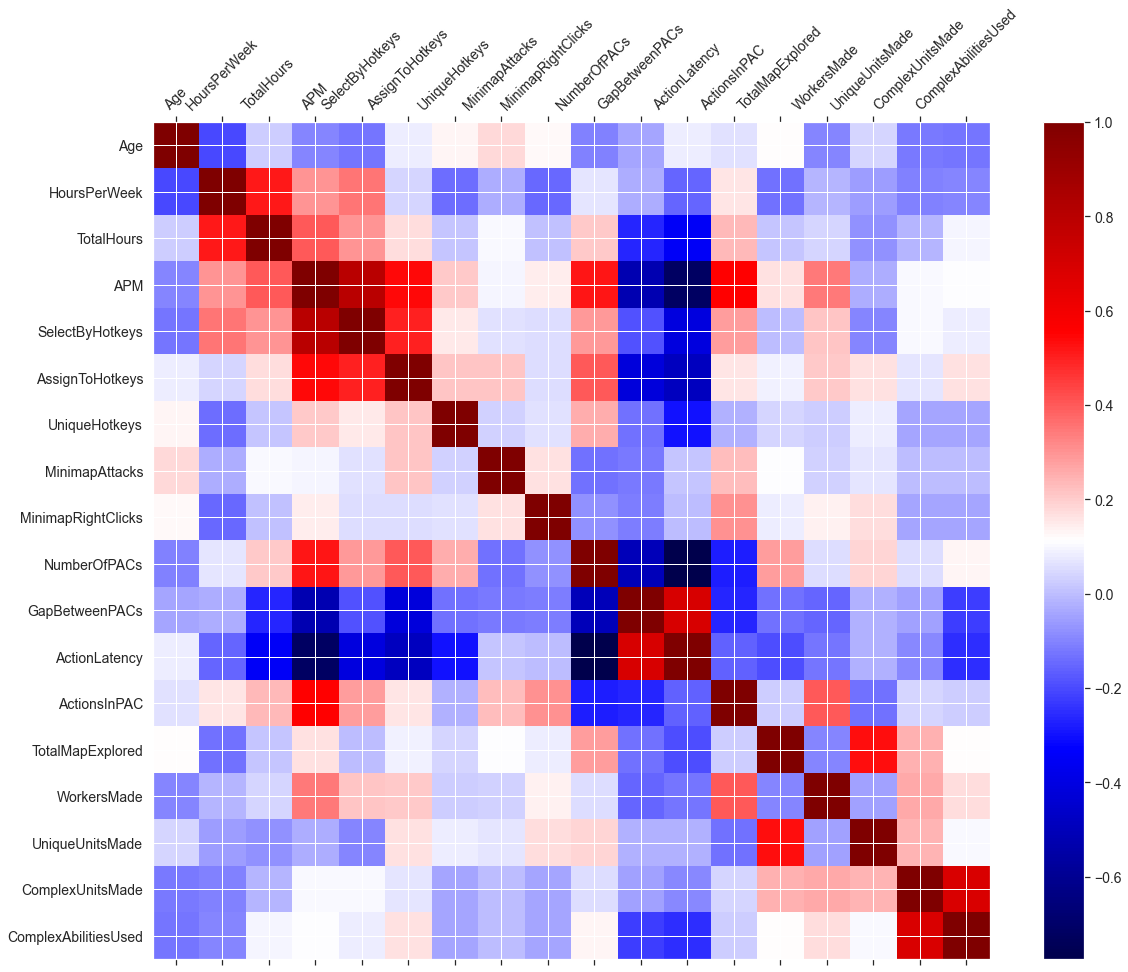

In [23]:
plt.figure(figsize=(19, 15))
plt.matshow(df_r.corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(df_r.select_dtypes(['number']).shape[1]), df_r.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_r.select_dtypes(['number']).shape[1]), df_r.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize=14)

# Regresión Básica

In [24]:
# Preprocesamiento
# Se usa un transformador para seleccionar unicamente las columnas que se quieren usar
selected_cols = ['Age','APM','SelectByHotkeys','AssignToHotkeys','MinimapRightClicks','NumberOfPACs','ActionLatency','ActionsInPAC','WorkersMade','ComplexUnitsMade']

pre = [('initial',ColumnTransformer([("selector", 'passthrough',selected_cols)])),]

In [25]:
# Modelo
model = [('model', LinearRegression())]

In [26]:
# Decalra el pipeline
pipeline = Pipeline(pre+model)

In [27]:
# Extraemos las variables explicativas y objetivo para entrenar
X = df.drop('LeagueIndex', axis = 1) 
y = df['LeagueIndex']

pipeline = pipeline.fit(X,y)

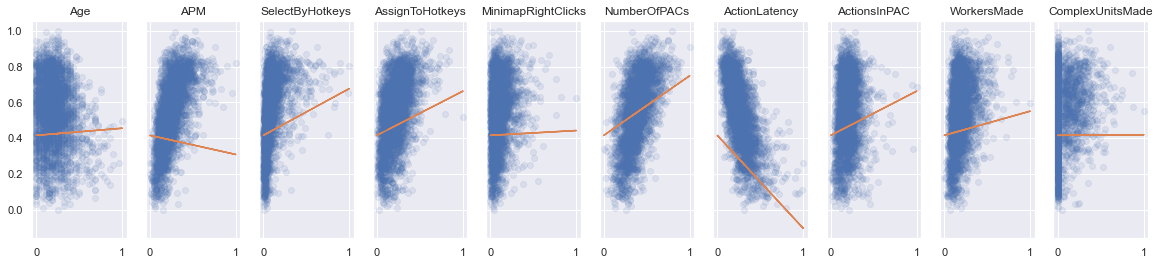

In [28]:
# Visualizamos la regresion lineal en cada dimension
f, axs = plt.subplots(1, len(selected_cols), sharey=True, figsize = (20,4))

for i in range(len(selected_cols)):       

    pos_col = i
    col = selected_cols[pos_col]

    # Variable x
    x = X[col]
    # Pendiente
    m = pipeline['model'].coef_[pos_col]
    # Interceto
    b = pipeline['model'].intercept_

    axs[i].plot(x, y, 'o', alpha = 0.1)
    axs[i].plot(x, x*m + b)
    axs[i].set_title(col)

# Coeficeientes

In [29]:
# Se construye el pipeline

pipeline['model'].coef_

array([ 0.03994903, -0.10701114,  0.26167369,  0.24711389,  0.02696975,
        0.33378462, -0.5205576 ,  0.24756026,  0.13547183,  0.00345232])

In [30]:
# En DataFrame
pd.DataFrame({'columns':selected_cols, 'coef':pipeline['model'].coef_})

,columns,coef
0,Age,0.039949
1,APM,-0.107011
2,SelectByHotkeys,0.261674
3,AssignToHotkeys,0.247114
4,MinimapRightClicks,0.026970
5,NumberOfPACs,0.333785
6,ActionLatency,-0.520558
7,ActionsInPAC,0.247560
8,WorkersMade,0.135472
9,ComplexUnitsMade,0.003452


dado que el data frame ya fue reescalado y limpiado previamente se puede tener confianza respecto a la lectura actual de los coeficientes

# Métricas

se exporta e importa el modelo en primera instancia

In [31]:
filename = 'pipeline.joblib'
dump(pipeline, filename) 
p = load(filename)
p

Pipeline(steps=[('initial',
                 ColumnTransformer(transformers=[('selector', 'passthrough',
                                                  ['Age', 'APM',
                                                   'SelectByHotkeys',
                                                   'AssignToHotkeys',
                                                   'MinimapRightClicks',
                                                   'NumberOfPACs',
                                                   'ActionLatency',
                                                   'ActionsInPAC',
                                                   'WorkersMade',
                                                   'ComplexUnitsMade'])])),
                ('model', LinearRegression())])

In [32]:
# coeficiente de determinacion R cuadrado del modelo; Dado que se tiene un valor de 0.48 se entiende que el modelo captura la variabilidad del 48% de los datos
p.score(X,y)

0.48055293681000055

In [33]:
#la raiz del error cuadrático medio. En este casi de 0.139. Es decir, la desviacion estandar de los errores en nuestro modelo es de 0.139

y_true = y
y_predicted = p.predict(X)
np.sqrt(mse(y_true, y_predicted))

0.13968775561592908

# Supuestos


## 1. Colinealidad


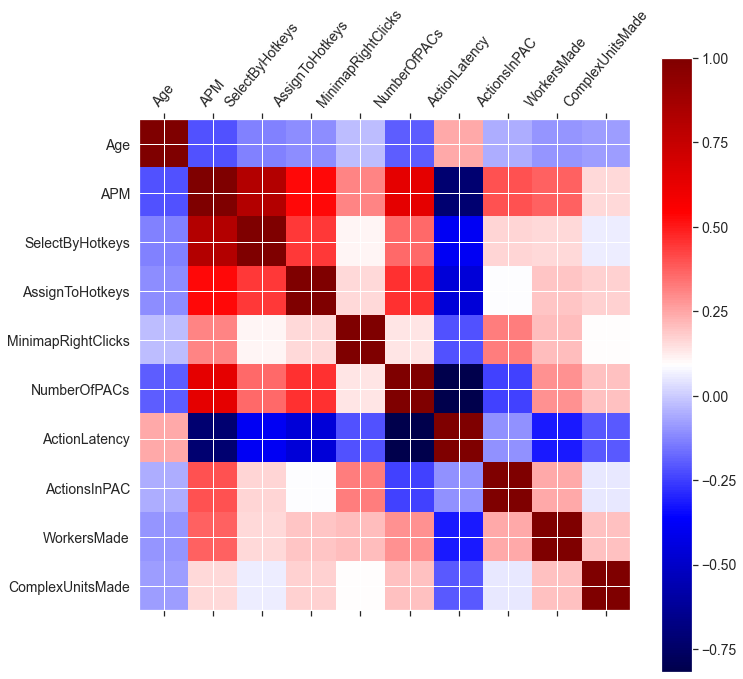

In [34]:
df_temp = df[selected_cols]


f = plt.figure(figsize=(11, 11))
plt.matshow(df_temp.corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(df_temp.select_dtypes(['number']).shape[1]), df_temp.select_dtypes(['number']).columns, fontsize=14, rotation=50)
plt.yticks(range(df_temp.select_dtypes(['number']).shape[1]), df_temp.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize=14)

In [35]:
# se encuentra el coeficiente de detrminacion R cuadrado para cada una de las columnas de forma individual
for col in selected_cols:
    model = [('initial',ColumnTransformer([("selector", 'passthrough',[col])])),
           ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
           ('scaler', MinMaxScaler()),
           ('model', LinearRegression())]

    p_temp = Pipeline(model)

    p_temp = p_temp.fit(X,y)

    print(f"{col}: {p_temp.score(X,y)}")

Age: 0.017955130426207444
APM: 0.3579662215187599
SelectByHotkeys: 0.16394182504230026
AssignToHotkeys: 0.22635998507300237
MinimapRightClicks: 0.036607556924550644
NumberOfPACs: 0.33348845821552553
ActionLatency: 0.4093376992530645
ActionsInPAC: 0.015774516694571195
WorkersMade: 0.09159155764452631
ComplexUnitsMade: 0.026059534222835468


## 2. Linealidad

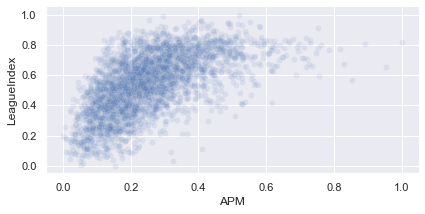

In [36]:
sns.pairplot(df, height=3, aspect = 2, y_vars = 'LeagueIndex', x_vars = ['APM'], kind='scatter', plot_kws = {'alpha':0.1})

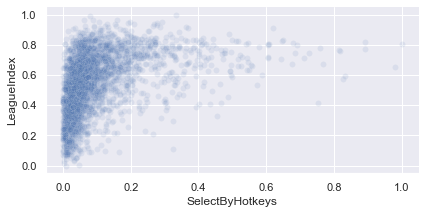

In [37]:
sns.pairplot(df, height=3, aspect = 2, y_vars = 'LeagueIndex', x_vars = ['SelectByHotkeys'], kind='scatter', plot_kws = {'alpha':0.1})

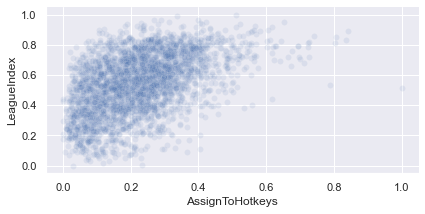

In [38]:
sns.pairplot(df, height=3, aspect = 2, y_vars = 'LeagueIndex', x_vars = ['AssignToHotkeys'], kind='scatter', plot_kws = {'alpha':0.1})

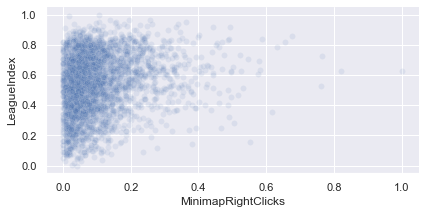

In [39]:
sns.pairplot(df, height=3, aspect = 2, y_vars = 'LeagueIndex', x_vars = ['MinimapRightClicks'], kind='scatter', plot_kws = {'alpha':0.1})

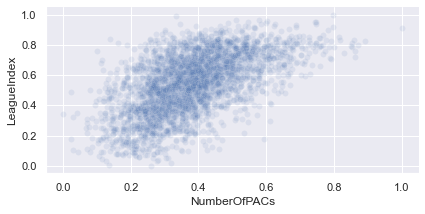

In [40]:
sns.pairplot(df, height=3, aspect = 2, y_vars = 'LeagueIndex', x_vars = ['NumberOfPACs'], kind='scatter', plot_kws = {'alpha':0.1})

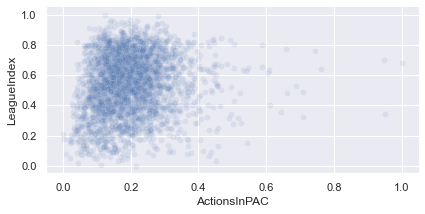

In [41]:
sns.pairplot(df, height=3, aspect = 2, y_vars = 'LeagueIndex', x_vars = ['ActionsInPAC'], kind='scatter', plot_kws = {'alpha':0.1})

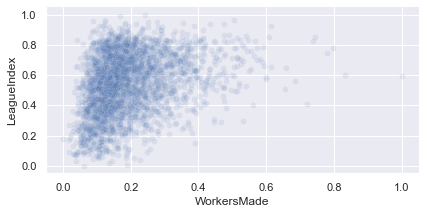

In [42]:
sns.pairplot(df, height=3, aspect = 2, y_vars = 'LeagueIndex', x_vars = ['WorkersMade'], kind='scatter', plot_kws = {'alpha':0.1})

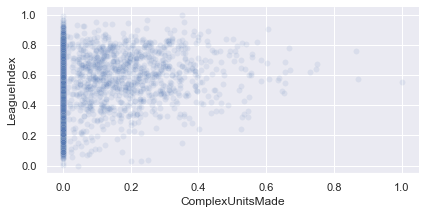

In [43]:
sns.pairplot(df, height=3, aspect = 2, y_vars = 'LeagueIndex', x_vars = ['ComplexUnitsMade'], kind='scatter', plot_kws = {'alpha':0.1})

Después de analizar la forma de las gráficas anteriores se determina que elimirán las variables Age, ActionINPack,ComplexUnitsMade, SelectByHotkeys, MinimapRightClicks y WorkersMade. Es decir, ahora las columnas seleccionadas para el análisis serán únicamente:  NumberOfPACs, AssignToHotkeys y APM.

In [44]:
selected_cols= ['NumberOfPACs','AssignToHotkeys','APM']

In [45]:
# Revisar si las variables tienen relación no lienal

# Creamos la variable
#X = selected_cols[['NumberOfPACs']].copy()
#X['NumberOfPACs_2'] = X['NumberOfPACs']**2

# columna
#col = 'NumberOfPACs_2'

#pre = [('initial',ColumnTransformer([("selector", 'passthrough',[col])])),
 #      ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
  #     ('scaler', MinMaxScaler())]

#model = [('model', LinearRegression())]

#p_temp = Pipeline(pre+model)

#p_temp = p_temp.fit(X,y)

#print(f"{col}: {p_temp.score(X,y)}")

## 3. Normalidad en los errores

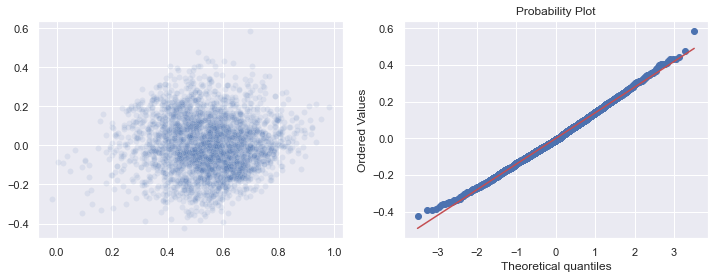

In [46]:
X = df.drop('LeagueIndex', axis = 1)
y = df['LeagueIndex']

# Calculamos los errores
errors = (p.predict(X) - y).values

fig, axes = plt.subplots(1, 2, figsize = (12,4))

# Dispersión
sns.scatterplot(x = p.predict(X), y = errors, alpha = 0.1, ax = axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

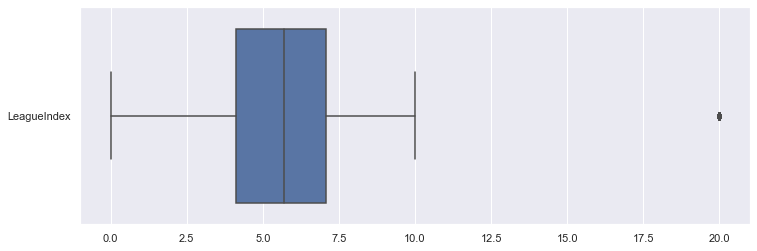

In [47]:
# Diagrama de caja
fig=plt.figure(figsize=(12,4))
ax = sns.boxplot(data= df_tracks[['LeagueIndex']], orient="h")

## 4. Varianza Constante (Homocedasticidad) 

<AxesSubplot:xlabel='LeagueIndex'>

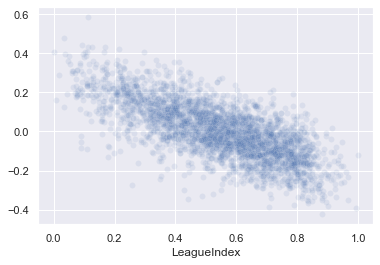

In [48]:
# Visualizamos nuestros datos
sns.scatterplot(data  = df, x = 'LeagueIndex', y = errors, alpha = 0.1)

# Último mejor estimador

In [49]:
#df_recent.drop('LeagueIndex', axis = 1, inplace = True)
#df_recent['LeagueIndex'] = p.predict(df_recent)
#sns.histplot(df_recent['LeagueIndex'])

# Exportación del modelo

In [50]:
# Usamos la lbreria joblib
filename = 'pipeline.joblib'
# Se guarda
dump(pipeline, filename) 

['pipeline.joblib']

In [51]:
# Se lee
p2 = load(filename)
p2

Pipeline(steps=[('initial',
                 ColumnTransformer(transformers=[('selector', 'passthrough',
                                                  ['Age', 'APM',
                                                   'SelectByHotkeys',
                                                   'AssignToHotkeys',
                                                   'MinimapRightClicks',
                                                   'NumberOfPACs',
                                                   'ActionLatency',
                                                   'ActionsInPAC',
                                                   'WorkersMade',
                                                   'ComplexUnitsMade'])])),
                ('model', LinearRegression())])

In [52]:
# Clasificamos los datos recientes
df_recent['LeagueIndex'] = p2.predict(df_recent)

<AxesSubplot:xlabel='LeagueIndex', ylabel='Count'>

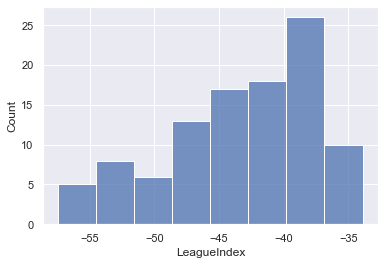

In [53]:
sns.histplot(df_recent['LeagueIndex'])